In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,Flatten
import numpy as np
import random
from keras.datasets import cifar10
from matplotlib import pyplot
import os
import seaborn as sns
import keras

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

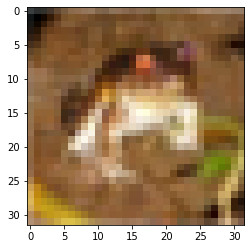

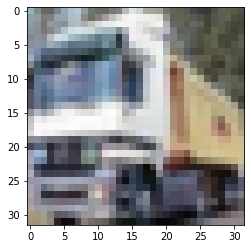

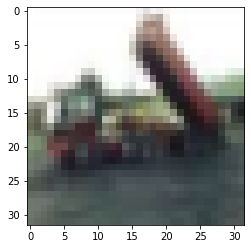

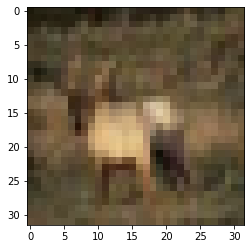

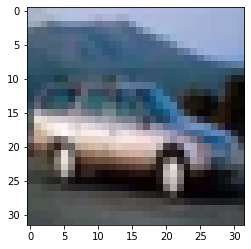

In [11]:

import matplotlib.pyplot as plt
for i in range(5):    
    plt.imshow(x_train[i])
    plt.show()
    

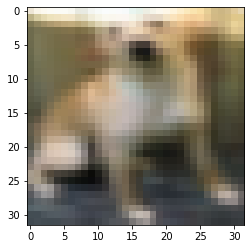

In [12]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

# model 1

In [13]:
model=Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [14]:
import keras
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [15]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4900 - accuracy: 0.4632
Epoch 2/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1725 - accuracy: 0.5843
Epoch 3/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0678 - accuracy: 0.6244
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0056 - accuracy: 0.6451
Epoch 5/5
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9583 - accuracy: 0.6651


In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.9520 - accuracy: 0.6726


[0.9520432353019714, 0.6725999712944031]

# model2

In [17]:

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [18]:
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [19]:
model2.fit(x_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 220s 140ms/step - loss: 1.5428 - accuracy: 0.4344
Epoch 2/5
1563/1563 [==============================] - 203s 130ms/step - loss: 1.1658 - accuracy: 0.5858
Epoch 3/5
1563/1563 [==============================] - 193s 124ms/step - loss: 1.0075 - accuracy: 0.6452
Epoch 4/5
1563/1563 [==============================] - 208s 133ms/step - loss: 0.9204 - accuracy: 0.6767
Epoch 5/5
1563/1563 [==============================] - 197s 126ms/step - loss: 0.8522 - accuracy: 0.7038


In [20]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.8062 - accuracy: 0.7178


[0.8061957359313965, 0.7178000211715698]